In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math


In [2]:
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


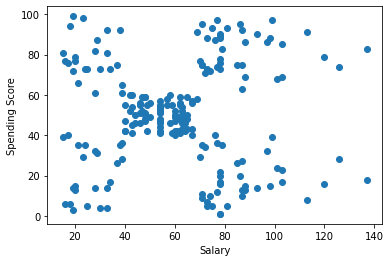

In [3]:
salary = df.iloc[:, -2]
spending_money = df.iloc[:, -1]

plt.scatter(salary, spending_money)
plt.xlabel("Salary")
plt.ylabel("Spending Score")
plt.show()

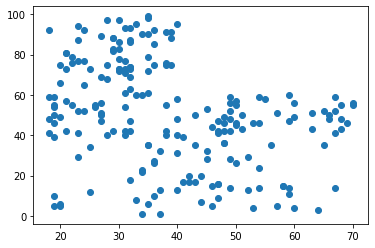

In [5]:
age = df.iloc[:,-3]

plt.scatter(age, spending_money)
plt.show()

In [15]:
x = df.iloc[:, -2:].values



# Creating cluster

### Calculating the G(centroid)
#### Centroid Mean -> K
### Best value of K is calculated by Elbo Method

In [16]:
display(Math("\\text{Euclidian Distance} = \\sqrt{(x1-x2)^2+(y1-y2)^2}"))

<IPython.core.display.Math object>

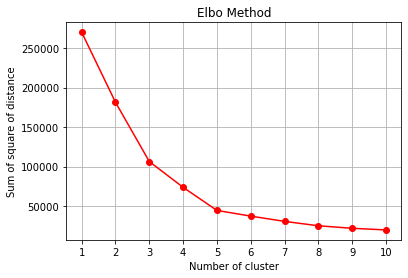

In [21]:
from sklearn.cluster import KMeans

ssd = []

for i in range(1, 11):
    cluster = KMeans(n_clusters=i, init='k-means++', random_state=7)
    cluster.fit(x)
    ssd.append(cluster.inertia_)
    
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 11), ssd, color='r', marker='o')
plt.title("Elbo Method")
plt.xticks(np.arange(1, 11))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of square of distance")
plt.grid()
plt.show()

In [28]:
finalmodel= KMeans(n_clusters=5, random_state=7)

y_means = finalmodel.fit_predict(x)

y_means

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

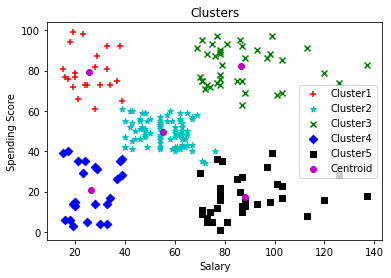

In [42]:
plt.figure(2)
plt.scatter(x[y_means == 0,0], x[y_means==0,1], color='r', marker='+', label="Cluster1")
plt.scatter(x[y_means == 1,0], x[y_means==1,1], color='c', marker='*', label="Cluster2")
plt.scatter(x[y_means == 2,0], x[y_means==2,1], color='g', marker='x', label="Cluster3")
plt.scatter(x[y_means == 3,0], x[y_means==3,1], color='b', marker='D', label="Cluster4")
plt.scatter(x[y_means == 4,0], x[y_means==4,1], color='k', marker='s', label="Cluster5")
plt.scatter(finalmodel.cluster_centers_[:,0], finalmodel.cluster_centers_[:,1], color='m',marker='o', label='Centroid')

plt.xlabel("Salary")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Clusters")
plt.show()